In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

trainset=torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainloader=torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset=torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

testloader=torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

classes=('Plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck')

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


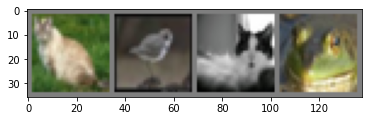

  cat bird  cat frog


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img=img/2+.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
    
dataiter=iter(trainloader)
images, labels= dataiter.next()


imshow(torchvision.utils.make_grid(images))
print(''.join('%5s' % classes[labels[j]] for j in range(4)))



In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
class nural_net(nn.Module):
    def __init__(self):
        super(nural_net, self).__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.conv2=nn.Conv2d(6,16,5)
        self.pool=nn.MaxPool2d(2,2)
        
        self.fc1=nn.Linear(16*5*5, 120)
        self.fc2=nn.Linear(120, 84)
        self.fc3=nn.Linear(84,10)
        
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        
        x=x.view(-1, 16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        
        return x
    
net=nural_net()

In [6]:
import torch.optim as optim

criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
for epoch in range(2):
    running_loss=0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels =data
        optimizer.zero_grad()
        outputs = net ( inputs)
        loss= criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        
        running_loss+=loss.item()
        if i % 2000==1999:
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
            running_loss=0.0
            
print('Finished Training')

[1,  2000] loss: 2.191
[1,  4000] loss: 1.836
[1,  6000] loss: 1.661
[1,  8000] loss: 1.547
[1, 10000] loss: 1.508
[1, 12000] loss: 1.454
[2,  2000] loss: 1.396
[2,  4000] loss: 1.368
[2,  6000] loss: 1.353
[2,  8000] loss: 1.324
[2, 10000] loss: 1.319
[2, 12000] loss: 1.276
Finished Training


In [8]:
PATH='./cifar_net.pth'
torch.save(net.state_dict(), PATH)

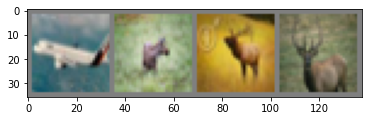

GroundTruth: Plane  deer  deer  deer


In [10]:
dataiter=iter(testloader)
images, labels =dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth:', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
net=nural_net()
net.load_state_dict(torch.load(PATH))
outputs=net(images)

In [13]:
outputs=net(images)

In [15]:
_,predicted =torch.max(outputs,1)
print('Predicted:', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:  ship  bird  deer  bird
